<a href="https://colab.research.google.com/github/jaishruti/Influence-Maximization/blob/main/InfluenceMaxLatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph formation

In [ ]:
import networkx as nx

#specifying path to edge list file
path_dataset = 'sample_data/Dataset2.txt'

#reading edge-list for graph formation
graph = nx.read_edgelist(path_dataset, create_using = nx.Graph(), nodetype=str)

num_of_nodes = graph.number_of_nodes()
count_edges = graph.number_of_edges()
#displaying graph info
print("Number of nodes: ", num_of_nodes)
print("Number of edges: ", count_edges)

#visualising graph
# nx.draw_networkx(graph)
#using list comphrehension
nodes = [node for node in graph.nodes()]


Number of nodes:  7624
Number of edges:  27806


#Diffusion Model

In [ ]:
def diffusion_threshold_model(threshold, list_of_seed_nodes):
  #access all N seed list
  # threshold = 0.5
  c=0
  activation_fraction=[]
  # print(list_of_seed_nodes)
  for i in list_of_seed_nodes:
    # print(i)
    c+=1
    # print("\n-----Iter ",c,"-----")
    # print(num_of_nodes)
    state = [0]*num_of_nodes
    weighted_value = [threshold]*num_of_nodes

    #change state of seed nodes in i
    for n in i:
      # print("New: ",n)
      state[int(n)] = 1
    # print(state)

    #to track num of activated nodes 
    count_activated_nodes = state.count(1)
    prev_count_activated_nodes = 0

    #diffusion threshold model
    t=0
    while prev_count_activated_nodes !=  count_activated_nodes:
      t+=1
      # print("hi")
      # print("--------",t,"-------")

      prev_count_activated_nodes = count_activated_nodes

      for node in graph.nodes():

        #execute if state of node is 0
        if state[int(node)] != 1:
          count_active_neighbors = 0 
          count_neighbors = 0

          #count active neighbors

          for n in graph.neighbors(node):
            if state[int(n)] == 1:
              count_active_neighbors += 1
            count_neighbors += 1
          
          #calculate weighted value
          weighted_value[int(node)] = count_active_neighbors / count_neighbors
          # print(f'weighted value of {node}: {weighted_value[int(node)]}')

          if weighted_value[int(node)] >= threshold:
            state[int(node)] = 1

      count_activated_nodes = state.count(1)  
      # print("State list: ",state)
      # print("count activated nodes: ", count_activated_nodes)
    af = state.count(1) / num_of_nodes
    activation_fraction.append(af)
    # print("Activation fraction: ",af)  
    
  #call plot function
  return(activation_fraction)

#extract random nodes from given percent

In [ ]:
import random

def random_nodes( percent, listt ):
  random_nodes_size = round(percent * num_of_nodes / 100)
  random_nodes = random.sample(listt, random_nodes_size)
  # print(random_nodes)
  return random_nodes

# random_node = random_nodes( 15 )


#forming global list for 10 simulations for different size

In [ ]:
def random_30_nodes(seed_size_list):
  percent = round(30 * num_of_nodes / 100)
  
  dictt= {}
  for i in seed_size_list:
    nodes_30_listt = []
    for j in range(10):
      nodes_30_listt.append(random_nodes(30, nodes))
    dictt[i] = nodes_30_listt
  print(dictt)
  return dictt

# random_30_nodes([5,7,10,15])

#finding max af out of listt of afs and returns [af,seedset]


In [ ]:
def find_max_af(listt, random_seeding_listt):
  max = 0
  seed_set = []
  max_af_listt = [] #[af, seed set]
  for i in range(len(listt)):
    af =listt[i]
    if af > max:
      max=af
      seed_set = random_seeding_listt[i]
  
  max_af_listt.append(max)
  max_af_listt.append(seed_set)
  return max_af_listt

#Seeding_strategies

#Random seeding strategy


In [ ]:
def random_seeding(threshold, seed_size_list): #returns activated nodes fractions for seed set 5%,7%,10%,15%
  
  dictt = {}
  max_af_seedset_listt=[]
  random_seeding_listt = []

  for i in seed_size_list:
    # random_seeding_listt = []
    for j in range(10):
      rnodes = random_nodes(i, random30[j])
      random_seeding_listt.append(rnodes)
    # print("Random seeding: ")
    # print(random_seeding_listt)
    af = diffusion_threshold_model(threshold, random_seeding_listt)
    max_af_seedset_listt = find_max_af(af,random_seeding_listt)
    random_seeding_listt.clear()
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt


  print("Random seeding strategy: ",dictt)

  return dictt



#One-hop strategy

In [ ]:
def OneHop(threshold, seed_size_list):
  dictt = {}
  max_af_seedset_listt=[]
  random_seeding_listt = []

  for i in seed_size_list:
    random_seeding_listt = []
    for j in range(10):
      rnodes = random_nodes(i, random30[j])
      for k in rnodes:
       neighbor = [n for n in graph.neighbors(str(k))]
       random_neighbor = random.choice(neighbor)
       random_seeding_listt.append(random_neighbor)
    af = diffusion_threshold_model(threshold, random_seeding_listt)
    max_af_seedset_listt = find_max_af(af,random_seeding_listt)
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt


  print("One-Hop seeding strategy: ",dictt)

  return dictt




#centralities

In [ ]:
betweenness = nx.betweenness_centrality(graph)
degreeCentrality = nx.degree_centrality(graph)
closeCentrality = nx.closeness_centrality(graph)
# eigCentrality = nx.eigenvector_centrality(graph)
# Print the betweenness centrality of each node
# for node, centrality in betweenness.items():
#     print(f"Node {node}: {centrality}")

print("Betweeness centrality: ", betweenness)
print("Degree centrality: ", degreeCentrality)
print("Closeness centrality: ", closeCentrality)

Betweeness centrality:  {'0': 0.0, '747': 0.0003672774363444215, '1': 0.0023061399557024686, '4257': 0.0042099704285937225, '2194': 0.001318568250167888, '580': 0.0, '6478': 0.009596805345788419, '1222': 0.0035137762392582557, '5735': 0.0003494628506040224, '7146': 7.385226060965302e-05, '2204': 0.0009525810160413849, '126': 0.0008825590358086654, '2639': 0.0012551251948347635, '2': 7.169570839335663e-05, '562': 0.00023760693586995135, '1492': 1.6108365970256753e-05, '6': 0.002139799818418406, '5303': 0.0015870991390064262, '7128': 0.00042158238648855686, '4154': 0.00015300506234827206, '5179': 6.005007030194674e-06, '3': 0.0007096114518852534, '1728': 4.0272232260976365e-05, '4560': 0.0011519731512118297, '5060': 0.004168111234317579, '1351': 3.4808931407649435e-05, '6503': 6.733919454682841e-05, '7089': 0.0037355595950981325, '4319': 0.008315319517066736, '6095': 0.0012018292877394472, '272': 6.95894306653162e-05, '4433': 0.0008870420000775504, '2900': 0.0002672765190299345, '3381': 

#one-hop hd

In [ ]:
def OneHopHD(threshold, high_degree, between_cent, close_cent, seed_size_list):

  dictt={}
  list_of_seed_nodes = []

  for i in seed_size_list:

    random_seeding_listt = []
    for j in range(10):

      list_of_neighbor = []
      #randomly select 15% of nodes
      random_nodes_15 = random_nodes(30,random30[j])
      
      #selcting random one neighbour of each node in Random_nodes(R)
      selected_neigh = []
      for k in random_nodes_15:
        l=[]
        #forming neighbor list
        for n in graph.neighbors(str(k)):
          l.append(n)
        
        #select randomly 1 neighbor of j 
        random_neighbor = random.choice(l)

        m=len(l)
        while m != 0 and random_neighbor in selected_neigh:
          random_neighbor = random.choice(l)
          m-=1
        selected_neigh.append(random_neighbor)

        #add it to list of neighbors
        list_of_neighbor.append(random_neighbor)


      #degree centrality of selected neighbors
      # dict->key(node), value(degree)
      dict_nodes = {}
      for k in list_of_neighbor:
        if between_cent == 1:
          dict_nodes[k] = betweenness[k]
        if high_degree == 1:
          dict_nodes[k] = degreeCentrality[k]
        # if eig_cent == 1:
        #   dict_nodes[k] = eigCentrality[k]
        if close_cent == 1:
          dict_nodes[k] = closeCentrality[k]
      # print("Neighbor nodes with their degree: ", dict_nodes)

      #get s highest degree nodes from neighbours
      # Sort the dictionary by value in descending order
      sorted_dict = sorted(dict_nodes.items(), key=lambda x: x[1], reverse=True)

      #calulated i percent -> number of nodes
      size = round(i * num_of_nodes / 100)

        # Extract the top k elements using slicing
      top_k = sorted_dict[:size]
        # print("Seed set ", i,": ", top_k)

        #seed set 
      seed_set = []
      for k in top_k:
        seed_set.append(k[0])
      # print("seed_set: ", seed_set)
      list_of_seed_nodes.append(seed_set)

    print(list_of_seed_nodes)
      #get activation fraction of diffusion
    af = diffusion_threshold_model(threshold, list_of_seed_nodes)
    # activation_fraction_matrix[seed_size] = af
    max_af_seedset_listt = find_max_af(af,list_of_seed_nodes)
    #{seed_percent: [af, seed set]}
    dictt[i] = max_af_seedset_listt
    list_of_seed_nodes.clear()


  print("One-HopHD seeding strategy: ",dictt)
  return dictt


#calling seeding strategy

In [ ]:
def seeding_strategies(percent):
  listt = []
  for i in range(10):
    random_30 = random_nodes(percent , nodes)
    listt.append(random_30)
  # print(listt)
  return listt

random30 = seeding_strategies(30)
for i in random30:
  print(i)





['841', '2462', '1643', '1615', '5455', '3275', '2261', '7620', '5421', '2721', '1266', '2416', '6170', '4415', '320', '1244', '2111', '900', '2523', '6383', '3936', '6310', '4941', '6755', '7309', '2460', '1001', '412', '571', '2341', '1042', '3610', '1973', '60', '4087', '2864', '4348', '953', '6955', '3438', '7119', '3023', '3213', '6960', '2793', '6275', '1151', '6422', '1334', '5188', '3422', '1359', '414', '6420', '1425', '3790', '7396', '2598', '7601', '5403', '4535', '2723', '4012', '5789', '7422', '5477', '638', '2811', '1866', '4406', '6966', '5046', '691', '2663', '6176', '7440', '3075', '6557', '3661', '3289', '682', '3686', '7516', '382', '1620', '7431', '4784', '1229', '6453', '2317', '6838', '3833', '6467', '4268', '4410', '1581', '987', '5998', '870', '2035', '6891', '4464', '331', '1965', '4783', '3614', '797', '7403', '784', '5981', '4527', '6631', '7055', '1900', '3645', '557', '3225', '1060', '5347', '658', '5265', '443', '1674', '6626', '4303', '3228', '2633', '186

In [14]:

seed_size_percent = [5,10,15,20]
threshold = 0.6
random_seed = random_seeding(threshold , seed_size_percent)
print("Random seeding: ", random_seed)
oneHop = OneHop(threshold , seed_size_percent)
print("Onehop: ", oneHop)
oneHopHd = OneHopHD(threshold , 1,0,0,seed_size_percent)
print("OnehopHD: ", oneHopHd)
oneHopBc = OneHopHD(threshold , 0,1,0,seed_size_percent)
print("OnehopBC: ", oneHopBc)
oneHopCc = OneHopHD(threshold , 0,0,1,seed_size_percent)
print("OnehopBC: ", oneHopCc)

Random seeding strategy:  {5: [0.06558237145855195, ['6367', '5654', '1445', '47', '5205', '5522', '4792', '4113', '2604', '5742', '2635', '7456', '1508', '2755', '5547', '7004', '6656', '461', '3975', '3355', '1188', '2763', '6873', '6719', '4110', '2560', '3657', '3038', '96', '6157', '3445', '89', '1116', '7604', '976', '3693', '5834', '4864', '1222', '6421', '1582', '5451', '4755', '3470', '4400', '3249', '80', '4313', '5863', '3358', '1772', '6553', '4990', '2970', '698', '6702', '1543', '1130', '3091', '3138', '2726', '5481', '3594', '5294', '301', '1278', '6120', '5541', '3622', '895', '157', '3849', '5016', '5855', '4793', '3289', '1194', '3262', '4654', '4002', '1419', '2112', '5341', '1464', '4379', '3468', '4924', '2267', '6200', '1843', '4487', '1135', '6337', '644', '1', '7217', '3746', '1684', '3958', '4027', '5711', '916', '5161', '2881', '6718', '6810', '6684', '3552', '5734', '3191', '425', '5447', '4050', '5249', '1344', '5104', '3567', '2426', '1385', '646', '1588', 

#Plotting strategy




#extract activated fraction

In [15]:
def extract_activated_fraction(dictt):
  af = list(dictt.values())
  y=[]
  for i in af:
    y.append(i[0])
  print(y)
  return y


#plot graph

[0.06558237145855195, 0.1322140608604407, 0.1991080797481637, 0.26875655823714584]
[0.0013116474291710388, 0.0013116474291710388, 0.0013116474291710388, 0.0013116474291710388]
[0.2823976915005247, 0.5658447009443861, 0.722193074501574, 0.8246327387198321]
[0.18363064008394545, 0.5119359916054564, 0.7594438614900315, 0.8399790136411333]
[0.22835781741867786, 0.4559286463798531, 0.6339192025183631, 0.748688352570829]


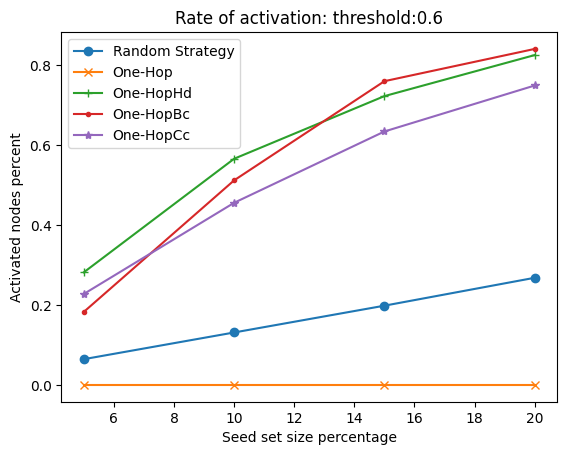

In [16]:
import matplotlib.pyplot as plt
import numpy as np


def plotting_graph(threshold, random, oneHop, oneHopHd):
  seed_set_sizes = [5,10,15,20]
  x = np.array(seed_set_sizes)
  y = extract_activated_fraction(random)
  plt.plot(x,y,label="Random Strategy", marker = 'o', )

  z = extract_activated_fraction(oneHop)
  plt.plot(x,z,label="One-Hop", marker = 'x', )

  h = extract_activated_fraction(oneHopHd)
  plt.plot(x,h,label="One-HopHd", marker = '+', )

  b = extract_activated_fraction(oneHopBc)
  plt.plot(x,b,label="One-HopBc", marker = '.', )

  c = extract_activated_fraction(oneHopCc)
  plt.plot(x,c,label="One-HopCc", marker = '*', )

  plt.title(f"Rate of activation: threshold:{threshold}")
  plt.xlabel(f"Seed set size percentage")
  plt.ylabel("Activated nodes percent")
  plt.legend()
  plt.show()

threshold = 0.6
plotting_graph(threshold , random_seed, oneHop, oneHopHd)
